In [3]:
library(forecast)

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



In [4]:
library(fpp2)

Loading required package: ggplot2

Loading required package: fma

Loading required package: expsmooth



In [3]:
oil

A Time Series:
 [1] 111.0091 130.8284 141.2871 154.2278 162.7409 192.1665 240.7997 304.2174
 [9] 384.0046 429.6622 359.3169 437.2519 468.4008 424.4353 487.9794 509.8284
[17] 506.3473 340.1842 240.2589 219.0328 172.0747 252.5901 221.0711 276.5188
[25] 271.1480 342.6186 428.3558 442.3946 432.7851 437.2497 437.2092 445.3641
[33] 453.1950 454.4096 422.3789 456.0371 440.3866 425.1944 486.2052 500.4291
[41] 521.2759 508.9476 488.8889 509.8706 456.7229 473.8166 525.9509 549.8338
[49] 542.3405

# D.I.Y 1
## oil data
1. oil 데이터의 단순지수평활법

In [4]:
oil_data<-window(oil, start=1996)
oil_data

A Time Series:
 [1] 445.3641 453.1950 454.4096 422.3789 456.0371 440.3866 425.1944 486.2052
 [9] 500.4291 521.2759 508.9476 488.8889 509.8706 456.7229 473.8166 525.9509
[17] 549.8338 542.3405

In [5]:
oil_fit<-ses(oil_data, initial='optimal')
oil_fit

# 왜 하나의 값으로 예측되는가...?

     Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
2014       542.6806 504.4541 580.9070 484.2183 601.1429
2015       542.6806 492.9073 592.4539 466.5589 618.8023
2016       542.6806 483.5747 601.7864 452.2860 633.0752
2017       542.6806 475.5269 609.8343 439.9778 645.3834
2018       542.6806 468.3452 617.0159 428.9945 656.3667
2019       542.6806 461.7988 623.5624 418.9826 666.3786
2020       542.6806 455.7439 629.6173 409.7224 675.6388
2021       542.6806 450.0841 635.2771 401.0665 684.2947
2022       542.6806 444.7509 640.6103 392.9100 692.4511
2023       542.6806 439.6935 645.6677 385.1754 700.1858

In [6]:
names(oil_fit)

[1] "model"     "mean"      "level"     "x"         "upper"     "lower"    
 [7] "fitted"    "method"    "series"    "residuals"

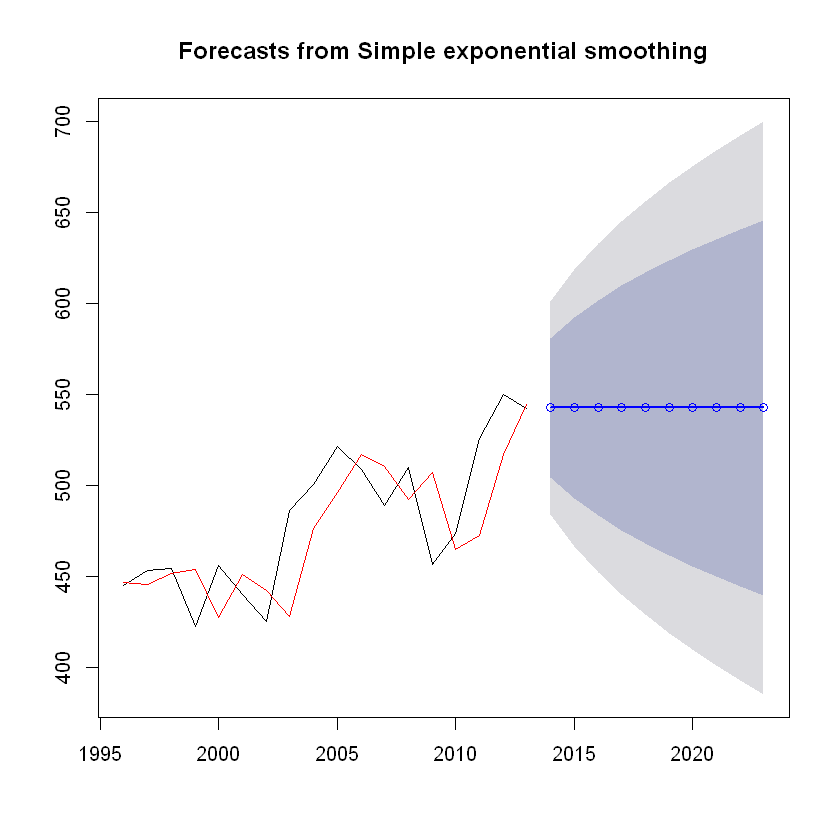

In [119]:
plot(oil_fit)
lines(oil_fit$fitted, col='red')
lines(oil_fit$mean, col='blue', type='o')

2. oil 데이터의 ETS모형

In [132]:
# 계절적 추세는 없으므로 Seasonal 인자에는 'N'사용
# 증가추세 이므로 승법 error인 'M'사용
# Trend인자에 감쇠추세 인자를 넣고 싶은데 A말고 뭘 써야하나요?????????????????
oil_ets<-ets(oil_data, model='MAN')
oil_ets

ETS(M,A,N) 

Call:
 ets(y = oil_data, model = "MAN") 

  Smoothing parameters:
    alpha = 4e-04 
    beta  = 4e-04 

  Initial states:
    l = 427.1202 
    b = 5.6778 

  sigma:  0.0573

     AIC     AICc      BIC 
176.8422 181.8422 181.2941 

In [133]:
# 자동으로 찾아주는 'ZZZ'사용하니 'ANN' model 사용
oil_ets2<-ets(oil_data)
oil_ets2

ETS(A,N,N) 

Call:
 ets(y = oil_data) 

  Smoothing parameters:
    alpha = 0.8338 

  Initial states:
    l = 446.5581 

  sigma:  29.8282

     AIC     AICc      BIC 
178.1430 179.8573 180.8141 

- 두 개 비교 결과 정보손실을 나타내는 AIC, AICc, BIC값들이 model='ANN'이 더 낮으므로 해당 모델 선택

In [134]:
names(oil_ets)

[1] "loglik"     "aic"        "bic"        "aicc"       "mse"       
 [6] "amse"       "fit"        "residuals"  "fitted"     "states"    
[11] "par"        "m"          "method"     "series"     "components"
[16] "call"       "initstate"  "sigma2"     "x"

In [137]:
# ets모형으로 예측값
oil_ets_fore<-forecast(oil_ets)
oil_ets_fore

     Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
2014       535.0076 495.7095 574.3056 474.9064 595.1087
2015       540.6861 500.9710 580.4013 479.9470 601.4252
2016       546.3647 506.2324 586.4970 484.9876 607.7417
2017       552.0432 511.4938 592.5927 490.0282 614.0583
2018       557.7218 516.7551 598.6884 495.0687 620.3749
2019       563.4003 522.0164 604.7842 500.1091 626.6916
2020       569.0789 527.2777 610.8801 505.1494 633.0083
2021       574.7574 532.5389 616.9760 510.1897 639.3251
2022       580.4360 537.8000 623.0719 515.2299 645.6420
2023       586.1145 543.0611 629.1679 520.2700 651.9590

In [138]:
names(oil_ets_fore)

[1] "model"     "mean"      "level"     "x"         "upper"     "lower"    
 [7] "fitted"    "method"    "series"    "residuals"

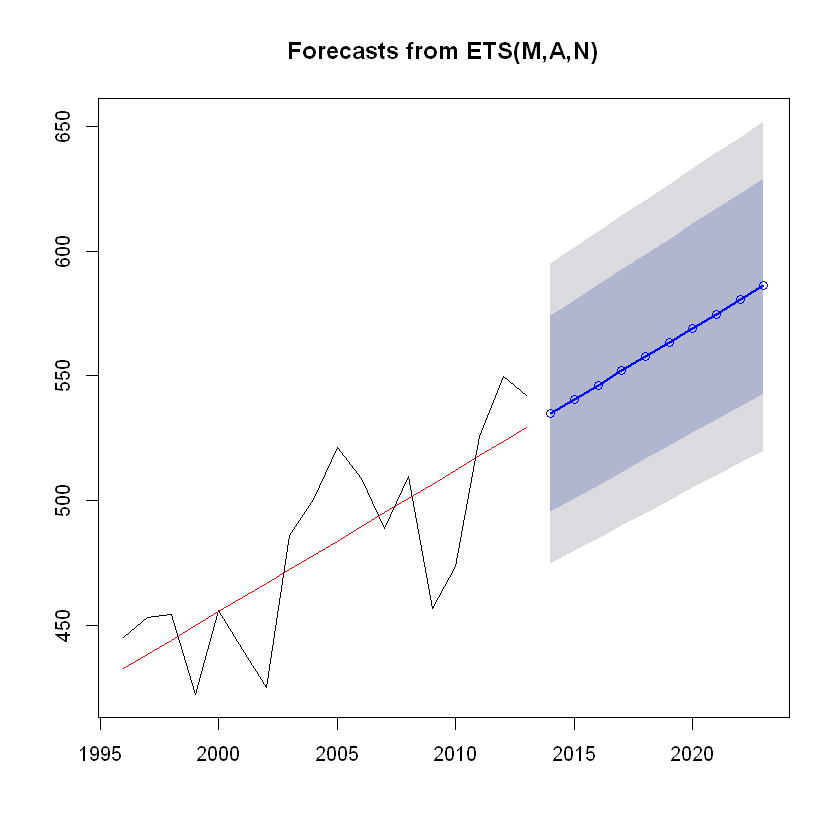

In [140]:
plot(oil_ets_fore)
lines(oil_ets_fore$fitted, col='red')
lines(oil_ets_fore$mean, col='blue', type='o')

# => Fitting된 값과 예측값이 왜이러지..? 이게 정상인가..?

3. oil 데이터의 단순지수평활법과 ETS모형 비교

In [126]:
# 단순지수평활법 요약
summary(oil_fit)

# ETS모형 요약
summary(oil_ets_fore)

# RMSE값과 기타 정보손실값들이 서로 매우 비슷
# 그러므로 두 개 중 어떤 모델을 써도 무방할듯


Forecast method: Simple exponential smoothing

Model Information:
Simple exponential smoothing 

Call:
 ses(y = oil_data, initial = "optimal") 

  Smoothing parameters:
    alpha = 0.8339 

  Initial states:
    l = 446.5868 

  sigma:  29.8282

     AIC     AICc      BIC 
178.1430 179.8573 180.8141 

Error measures:
                   ME     RMSE     MAE      MPE     MAPE      MASE        ACF1
Training set 6.401975 28.12234 22.2587 1.097574 4.610635 0.9256774 -0.03377748

Forecasts:
     Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
2014       542.6806 504.4541 580.9070 484.2183 601.1429
2015       542.6806 492.9073 592.4539 466.5589 618.8023
2016       542.6806 483.5747 601.7864 452.2860 633.0752
2017       542.6806 475.5269 609.8343 439.9778 645.3834
2018       542.6806 468.3452 617.0159 428.9945 656.3667
2019       542.6806 461.7988 623.5624 418.9826 666.3786
2020       542.6806 455.7439 629.6173 409.7224 675.6388
2021       542.6806 450.0841 635.2771 401.0665 684.2947
2022  

## ausair 데이터

In [127]:
ausair_data<-window(ausair, start=1990)
ausair_data

A Time Series:
 [1] 17.55340 21.86010 23.88660 26.92930 26.88850 28.83140 30.07510 30.95350
 [9] 30.18570 31.57970 32.57757 33.47740 39.02158 41.38643 41.59655 44.65732
[17] 46.95177 48.72884 51.48843 50.02697 60.64091 63.36031 66.35527 68.19795
[25] 68.12324 69.77935 72.59770

1. ausair 데이터의 holt 선형지수평활법

In [141]:
ausair_holt<-holt(ausair_data, h=12)
ausair_holt

     Point Forecast    Lo 80     Hi 80    Lo 95     Hi 95
2017       74.60130 71.57106  77.63154 69.96695  79.23566
2018       76.70304 72.76440  80.64169 70.67941  82.72668
2019       78.80478 74.13092  83.47864 71.65673  85.95284
2020       80.90652 75.59817  86.21487 72.78810  89.02494
2021       83.00826 77.13343  88.88310 74.02348  91.99305
2022       85.11000 78.71857  91.50143 75.33516  94.88485
2023       87.21174 80.34235  94.08113 76.70591  97.71757
2024       89.31348 81.99718  96.62978 78.12417 100.50280
2025       91.41522 83.67768  99.15276 79.58168 103.24876
2026       93.51696 85.37987 101.65405 81.07236 105.96157
2027       95.61870 87.10069 104.13671 82.59153 108.64587
2028       97.72044 88.83774 106.60314 84.13553 111.30535

In [142]:
ausair_holt_d<-holt(ausair_data, damped=TRUE, h=12)
ausair_holt_d

     Point Forecast    Lo 80     Hi 80    Lo 95     Hi 95
2017       74.10429 70.85945  77.34913 69.14174  79.06685
2018       75.72699 71.34160  80.11238 69.02012  82.43386
2019       77.31724 71.95975  82.67472 69.12367  85.51081
2020       78.87568 72.63402  85.11733 69.32989  88.42147
2021       80.40295 73.33096  87.47494 69.58727  91.21862
2022       81.89967 74.03329  89.76606 69.86907  93.93028
2023       83.36647 74.73101  92.00192 70.15968  96.57325
2024       84.80392 75.41796  94.18988 70.44933  99.15851
2025       86.21263 76.09013  96.33513 70.73161 101.69365
2026       87.59316 76.74490  98.44143 71.00217 104.18415
2027       88.94608 77.38050 100.51167 71.25805 106.63412
2028       90.27195 77.99578 102.54811 71.49717 109.04672

In [143]:
# holt선형추세랑 감쇠추세법 RMSE값 비교후 적은 값인 모델 선택
summary(ausair_holt)
summary(ausair_holt_d)

# holt 감쇠추세법보다는 holt 선형추세선택


Forecast method: Holt's method

Model Information:
Holt's method 

Call:
 holt(y = ausair_data, h = 12) 

  Smoothing parameters:
    alpha = 0.8302 
    beta  = 1e-04 

  Initial states:
    l = 15.5715 
    b = 2.1017 

  sigma:  2.3645

     AIC     AICc      BIC 
141.1291 143.9863 147.6083 

Error measures:
                      ME     RMSE     MAE        MPE     MAPE      MASE
Training set 0.008359331 2.182343 1.52892 -0.3244107 3.820787 0.6654839
                    ACF1
Training set -0.01335362

Forecasts:
     Point Forecast    Lo 80     Hi 80    Lo 95     Hi 95
2017       74.60130 71.57106  77.63154 69.96695  79.23566
2018       76.70304 72.76440  80.64169 70.67941  82.72668
2019       78.80478 74.13092  83.47864 71.65673  85.95284
2020       80.90652 75.59817  86.21487 72.78810  89.02494
2021       83.00826 77.13343  88.88310 74.02348  91.99305
2022       85.11000 78.71857  91.50143 75.33516  94.88485
2023       87.21174 80.34235  94.08113 76.70591  97.71757
2024       89.31

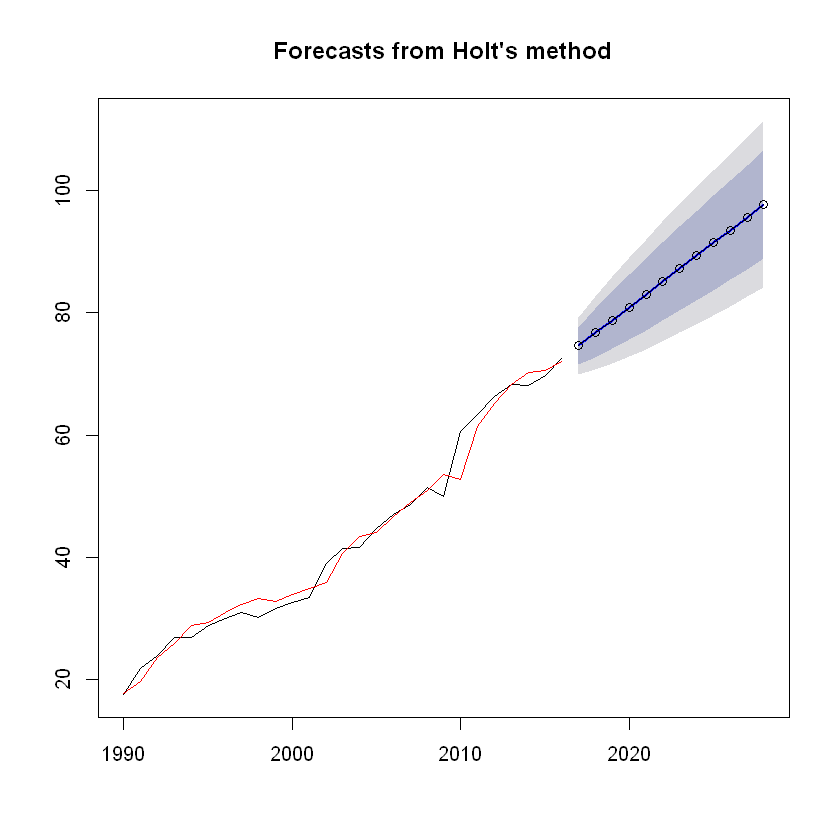

In [144]:
plot(ausair_holt)
lines(ausair_holt$fitted, col='red')
lines(ausair_holt$mean, type='o')

2. ausair 데이터의 ETS모형

In [148]:
# 우선 증가추세니 승법error
# Trend는 N일때랑 A일 때랑 비교해서 RMSE낮은거 선택
# 계절적 추세는 없으니 'N'
ausair_ets<-ets(ausair_data, model='MNN')
summary(ausair_ets)

ausair_ets3<-ets(ausair_data, model='MAN')
summary(ausair_ets3)

# 자동으로 적합해주는 model='ZZZ'적용해보기 => 'MAN'모델로 자동선택됨
ausair_ets2<-ets(ausair_data)
summary(ausair_ets2)

# => RMSE값이 이게 더 낮으므로 'MAN'모델 사용

ETS(M,N,N) 

Call:
 ets(y = ausair_data, model = "MNN") 

  Smoothing parameters:
    alpha = 0.9999 

  Initial states:
    l = 17.4334 

  sigma:  0.0882

     AIC     AICc      BIC 
158.2981 159.3415 162.1856 

Training set error measures:
                   ME     RMSE      MAE      MPE     MAPE      MASE       ACF1
Training set 2.043319 3.039254 2.216942 4.991528 5.415533 0.9649552 -0.2119818
ETS(M,A,N) 

Call:
 ets(y = ausair_data, model = "MAN") 

  Smoothing parameters:
    alpha = 0.8356 
    beta  = 1e-04 

  Initial states:
    l = 16.1057 
    b = 2.0994 

  sigma:  0.0571

     AIC     AICc      BIC 
139.5747 142.4319 146.0539 

Training set error measures:
                      ME     RMSE      MAE        MPE     MAPE      MASE
Training set -0.01242452 2.182641 1.541071 -0.4451094 3.904974 0.6707726
                    ACF1
Training set -0.02819235
ETS(M,A,N) 

Call:
 ets(y = ausair_data) 

  Smoothing parameters:
    alpha = 0.8356 
    beta  = 1e-04 

  Initial states:


In [149]:
# ets모델 예측값
ausair_ets_fore<-forecast(ausair_ets2, h=12)
ausair_ets_fore

     Point Forecast    Lo 80     Hi 80    Lo 95     Hi 95
2017       74.60050 69.14415  80.05686 66.25572  82.94529
2018       76.69984 69.46579  83.93389 65.63632  87.76336
2019       78.79918 70.07099  87.52736 65.45057  92.14779
2020       80.89851 70.83087  90.96615 65.50139  96.29564
2021       82.99785 71.68873  94.30696 65.70205 100.29365
2022       85.09719 72.61385  97.58053 66.00557 104.18881
2023       87.19652 73.58745 100.80559 66.38324 108.00980
2024       89.29586 74.59716 103.99456 66.81613 111.77558
2025       91.39519 75.63431 107.15608 67.29101 115.49938
2026       93.49453 76.69262 110.29644 67.79823 119.19083
2027       95.59387 77.76734 113.42039 68.33055 122.85719
2028       97.69320 78.85482 116.53159 68.88238 126.50403

In [150]:
names(ausair_ets_fore)

[1] "model"     "mean"      "level"     "x"         "upper"     "lower"    
 [7] "fitted"    "method"    "series"    "residuals"

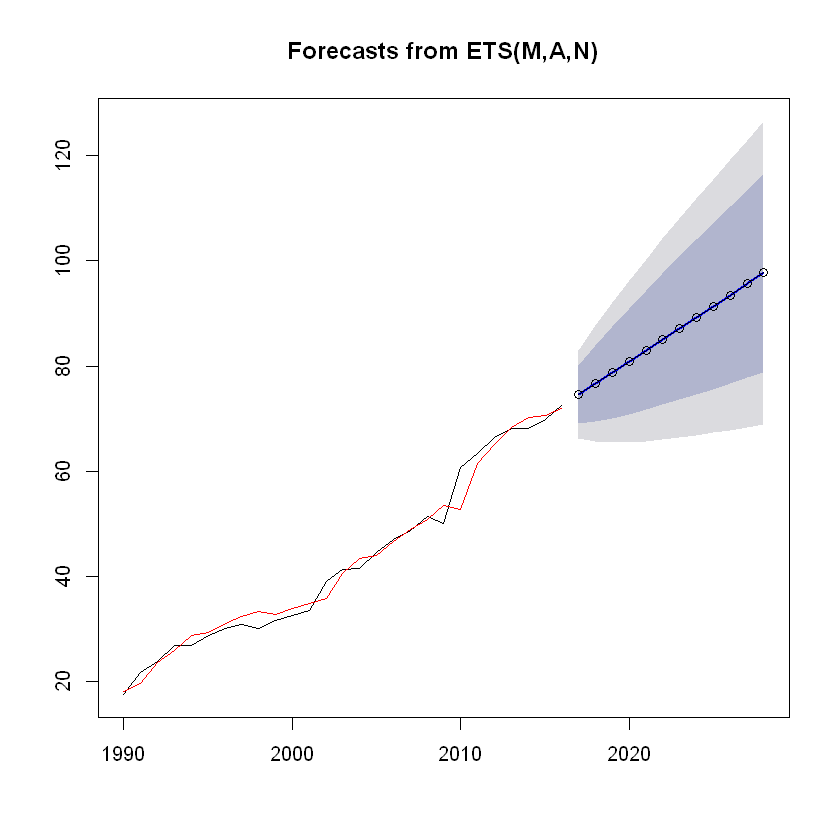

In [151]:
plot(ausair_ets_fore)
lines(ausair_ets_fore$fitted, col='red')
lines(ausair_ets_fore$mean,type='o')

3. ausair 데이터의 holt선형추세법과 ETS모형 비교 후 적합모델 선정
    - RMSE값으로 비교

In [152]:
summary(ausair_holt)
summary(ausair_ets_fore)

# holt선형추세 모델이 RMSE값이 조금 더 낮으므로 해당 모델이 최적합


Forecast method: Holt's method

Model Information:
Holt's method 

Call:
 holt(y = ausair_data, h = 12) 

  Smoothing parameters:
    alpha = 0.8302 
    beta  = 1e-04 

  Initial states:
    l = 15.5715 
    b = 2.1017 

  sigma:  2.3645

     AIC     AICc      BIC 
141.1291 143.9863 147.6083 

Error measures:
                      ME     RMSE     MAE        MPE     MAPE      MASE
Training set 0.008359331 2.182343 1.52892 -0.3244107 3.820787 0.6654839
                    ACF1
Training set -0.01335362

Forecasts:
     Point Forecast    Lo 80     Hi 80    Lo 95     Hi 95
2017       74.60130 71.57106  77.63154 69.96695  79.23566
2018       76.70304 72.76440  80.64169 70.67941  82.72668
2019       78.80478 74.13092  83.47864 71.65673  85.95284
2020       80.90652 75.59817  86.21487 72.78810  89.02494
2021       83.00826 77.13343  88.88310 74.02348  91.99305
2022       85.11000 78.71857  91.50143 75.33516  94.88485
2023       87.21174 80.34235  94.08113 76.70591  97.71757
2024       89.31

## austourists 데이터

1. austourists 데이터 홀트-윈터스 모형

In [57]:
austo_data<-window(austourists,start=2005)
austo_data

,Qtr1,Qtr2,Qtr3,Qtr4
2005,42.20566,24.64917,32.66734,37.25735
2006,45.24246,29.35048,36.34421,41.78208
2007,49.27660,31.27540,37.85063,38.83704
2008,51.23690,31.83855,41.32342,42.79900
2009,55.70836,33.40714,42.31664,45.15712
2010,59.57608,34.83733,44.84168,46.97125
2011,60.01903,38.37118,46.97586,50.73380
2012,61.64687,39.29957,52.67121,54.33232
2013,66.83436,40.87119,51.82854,57.49191
2014,65.25147,43.06121,54.76076,59.83447


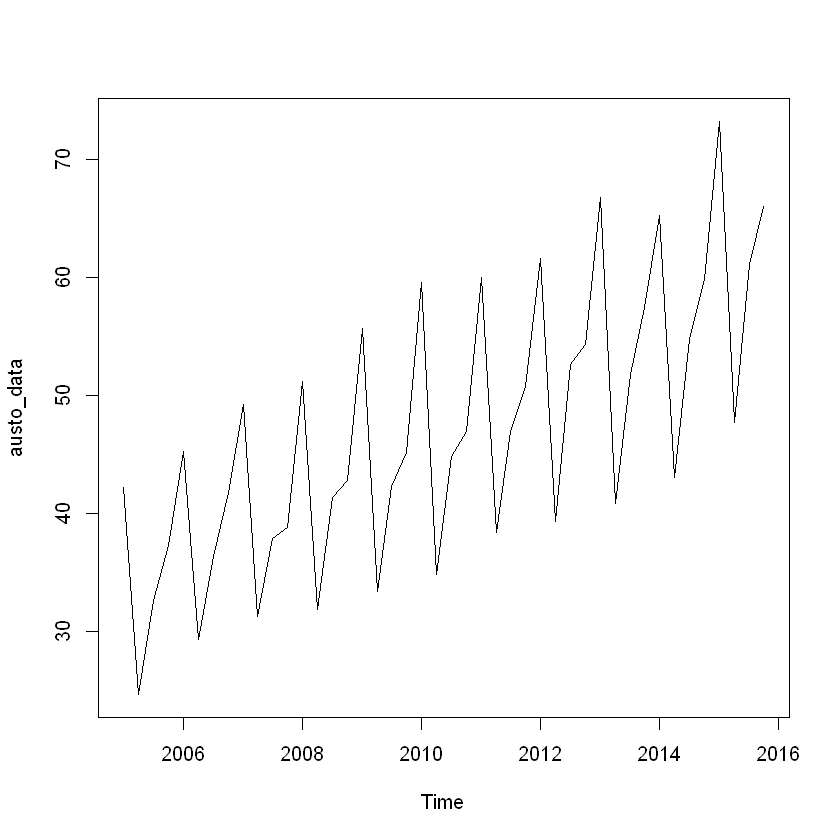

In [62]:
# 증가추세 
plot(austo_data)

In [153]:
# 증가추세 => holt-winters모형에서 승법적 모형 선택!
# 가법적 모형도 시험삼아 비교해보기
# 연도별 데이터는 홀트윈터스 적용안됨!

# 승법모형 -> 예상되로 승법모형이 RMSE값이 더 작음!
austo_hw_m<-hw(austo_data, seasonal = 'multiplicative', h = 12)
summary(austo_hw_m)
# 가법모형
austo_hw_a<-hw(austo_data, seasonal = 'additive', h = 12)
summary(austo_hw_a)



Forecast method: Holt-Winters' multiplicative method

Model Information:
Holt-Winters' multiplicative method 

Call:
 hw(y = austo_data, h = 12, seasonal = "multiplicative") 

  Smoothing parameters:
    alpha = 0.4406 
    beta  = 0.0134 
    gamma = 0.0023 

  Initial states:
    l = 32.4875 
    b = 0.6974 
    s = 1.0237 0.9618 0.7704 1.2442

  sigma:  0.0367

     AIC     AICc      BIC 
221.1313 226.4254 237.1890 

Error measures:
                     ME     RMSE     MAE           MPE    MAPE      MASE
Training set 0.09206228 1.575631 1.25496 -0.0006505533 2.70539 0.4112302
                    ACF1
Training set -0.07955726

Forecasts:
        Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
2016 Q1       80.08894 76.31865 83.85922 74.32278 85.85509
2016 Q2       50.15482 47.56655 52.74309 46.19640 54.11324
2016 Q3       63.34322 59.80143 66.88502 57.92652 68.75993
2016 Q4       68.17810 64.08399 72.27221 61.91670 74.43950
2017 Q1       83.80112 78.43079 89.17146 75.58790 92.014

[1] "model"     "mean"      "level"     "x"         "upper"     "lower"    
 [7] "fitted"    "method"    "series"    "residuals"

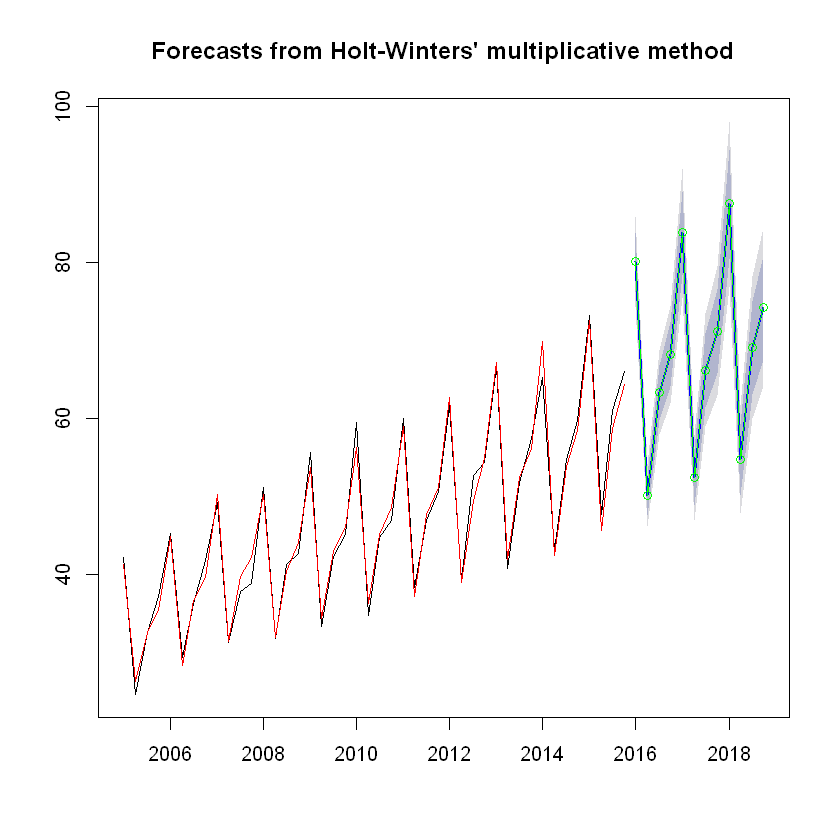

In [154]:
# 홀트윈터스모형 변수명 보기
names(austo_hw_m)
# 홀트윈터스모형 시각화
plot(austo_hw_m)
lines(austo_hw_m$fitted, col='red')
lines(austo_hw_m$mean, col='green', type='o')

2. austourists 데이터 ETS모형

In [155]:
# 증가추세 -> 승법 error
# Trend는 N,A 둘다 경우의 수 해보고 RMSE값 낮은걸로 채택
# seasonal은 승법으로

# trend가 N일 때
austo_ets1<-ets(austo_data, model='MNM')
summary(austo_ets1)

# trend가 A일 때 => RMSE값이 낮다! 이걸로 채택!
austo_ets2<-ets(austo_data, model='MAM')
summary(austo_ets2)

ETS(M,N,M) 

Call:
 ets(y = austo_data, model = "MNM") 

  Smoothing parameters:
    alpha = 0.5025 
    gamma = 1e-04 

  Initial states:
    l = 39.6108 
    s = 1.0272 0.9644 0.7706 1.2378

  sigma:  0.056

     AIC     AICc      BIC 
254.8646 257.9757 267.3539 

Training set error measures:
                   ME     RMSE      MAE     MPE     MAPE      MASE      ACF1
Training set 1.072687 2.385182 1.864622 1.89411 4.016307 0.6110066 0.1417157
ETS(M,A,M) 

Call:
 ets(y = austo_data, model = "MAM") 

  Smoothing parameters:
    alpha = 0.1908 
    beta  = 0.0392 
    gamma = 2e-04 

  Initial states:
    l = 32.3679 
    b = 0.9281 
    s = 1.0218 0.9628 0.7683 1.2471

  sigma:  0.0383

     AIC     AICc      BIC 
224.8628 230.1569 240.9205 

Training set error measures:
                     ME     RMSE     MAE        MPE     MAPE     MASE      ACF1
Training set 0.04836907 1.670893 1.24954 -0.1845609 2.692849 0.409454 0.2005962


In [157]:
# ets모형으로 미래값 예측
austo_ets2_fore<-forecast(austo_ets2, h=12)
austo_ets2_fore

        Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
2016 Q1       78.99701 75.12395 82.87007 73.07368 84.92034
2016 Q2       49.45352 46.96750 51.93955 45.65148 53.25557
2016 Q3       62.96068 59.69471 66.22665 57.96581 67.95555
2016 Q4       67.86576 64.21150 71.52002 62.27705 73.45447
2017 Q1       84.09844 79.37334 88.82353 76.87203 91.32484
2017 Q2       52.59637 49.49981 55.69293 47.86059 57.33214
2017 Q3       66.89935 62.75862 71.04007 60.56666 73.23204
2017 Q4       72.04590 67.34675 76.74505 64.85917 79.23263
2018 Q1       89.19987 83.05929 95.34044 79.80867 98.59106
2018 Q2       55.73921 51.68629 59.79214 49.54080 61.93762
2018 Q3       70.83802 65.39636 76.27968 62.51572 79.16032
2018 Q4       76.22604 70.04134 82.41075 66.76736 85.68473

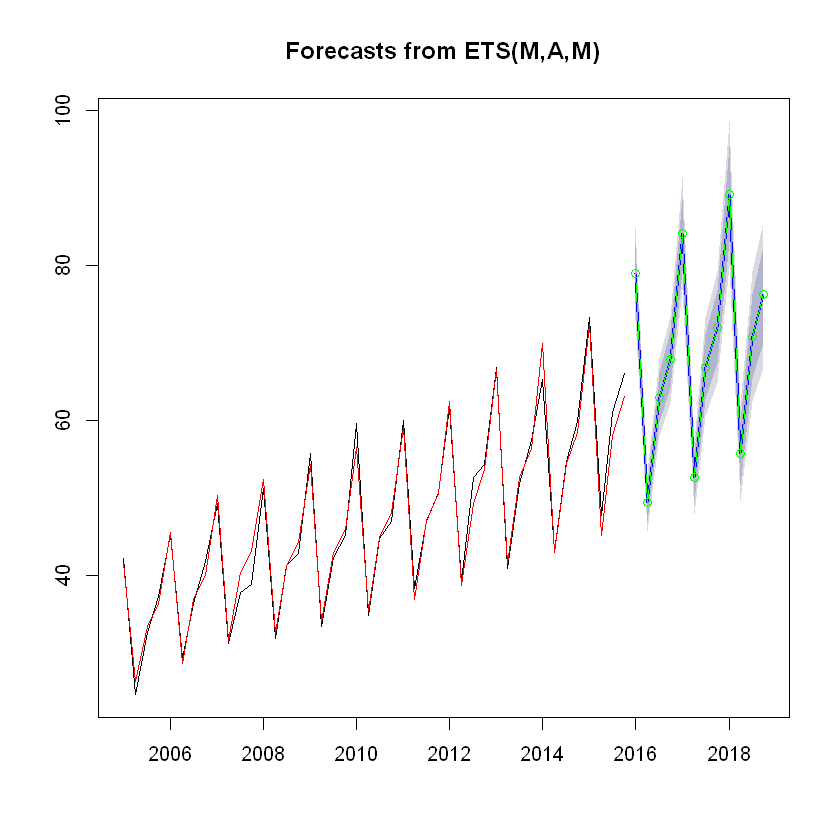

In [159]:
# ets모형 시각화
plot(austo_ets2_fore)
lines(austo_ets2_fore$fitted, col='red')
lines(austo_ets2_fore$mean, col='green', type='o')

3. austourists데이터 홀트-윈터스 모형과 ETS모형 비교

In [160]:
summary(austo_hw_m)
summary(austo_ets2_fore)


# 홀트-윈터스의 승법모형을 적용한 모델이 RMSE값이 더 낮다! 그러므로 해당 모델 채택!


Forecast method: Holt-Winters' multiplicative method

Model Information:
Holt-Winters' multiplicative method 

Call:
 hw(y = austo_data, h = 12, seasonal = "multiplicative") 

  Smoothing parameters:
    alpha = 0.4406 
    beta  = 0.0134 
    gamma = 0.0023 

  Initial states:
    l = 32.4875 
    b = 0.6974 
    s = 1.0237 0.9618 0.7704 1.2442

  sigma:  0.0367

     AIC     AICc      BIC 
221.1313 226.4254 237.1890 

Error measures:
                     ME     RMSE     MAE           MPE    MAPE      MASE
Training set 0.09206228 1.575631 1.25496 -0.0006505533 2.70539 0.4112302
                    ACF1
Training set -0.07955726

Forecasts:
        Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
2016 Q1       80.08894 76.31865 83.85922 74.32278 85.85509
2016 Q2       50.15482 47.56655 52.74309 46.19640 54.11324
2016 Q3       63.34322 59.80143 66.88502 57.92652 68.75993
2016 Q4       68.17810 64.08399 72.27221 61.91670 74.43950
2017 Q1       83.80112 78.43079 89.17146 75.58790 92.014

# D.I.Y 2

1. oil 데이터 단순지수평활법 vs ETS모델
    * 적합한 ETS모델은 D.I.Y 1에서 했던 결과값에 의해 선정
    * model='ANN' 선택

In [5]:
# 데이터 분할
oil_train<-window(oil, start=1970, end=2000)
oil_test<-window(oil, start=2001, end=2013)

# 단순지수평활법 적용
fit_ses<-ses(oil_train, initial='optimal', h=13)
# ETS 모델 적용
fit_ets<-ets(oil_train, model='ANN')

# 두 모델의 예측값 할당(2000~2013년도까지 13개 미래값 예측)
for_ses<-forecast(fit_ses, h=13)
for_ets<-forecast(fit_ets, h=13)

# test데이터와 예측값 비교해서 accuracy 측정
accuracy(for_ses, oil_test)
accuracy(for_ets, oil_test)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,8.513001,56.56321,42.74775,1.237038,13.114133,0.9677709,0.1888919,NA
Test set,38.571081,53.03398,45.72286,7.279514,8.941984,1.0351246,0.4988118,1.605385


,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,8.514241,56.56321,42.74899,1.237683,13.114778,0.967799,0.1889093,NA
Test set,38.571085,53.03399,45.72286,7.279515,8.941984,1.035125,0.4988118,1.605385


In [6]:
# 똑같은 값으로 예측이 되는게 정상인가..?;;
for_ses 

     Point Forecast    Lo 80    Hi 80     Lo 95    Hi 95
2001       456.0338 381.0872 530.9804 341.41282 570.6547
2002       456.0338 350.0486 562.0190 293.94338 618.1241
2003       456.0338 326.2311 585.8364 257.51771 654.5498
2004       456.0338 306.1518 605.9157 226.80909 685.2584
2005       456.0338 288.4615 623.6060 199.75407 712.3134
2006       456.0338 272.4681 639.5994 175.29436 736.7731
2007       456.0338 257.7607 654.3068 152.80127 759.2662
2008       456.0338 244.0713 667.9962 131.86518 780.2023
2009       456.0338 231.2139 680.8536 112.20153 799.8660
2010       456.0338 219.0531 693.0144  93.60317 818.4643
2011       456.0338 207.4866 704.5809  75.91370 836.1538
2012       456.0338 196.4349 715.6326  59.01161 853.0559
2013       456.0338 185.8349 726.2326  42.80027 869.2672

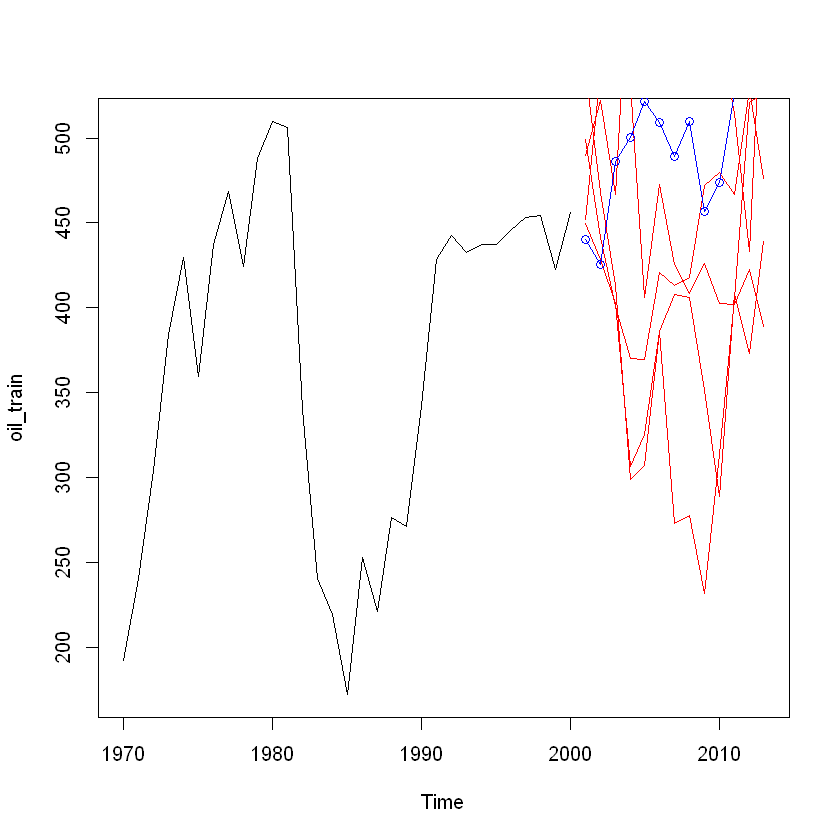

In [7]:
# 모형의 미래 예측값 시뮬레이션 돌리기
# 시뮬레이션을 돌리기 위해서는 errors항이 존재해야 하는데 ses(단순지수평활법)은 errors항이 없음!
plot(oil_train, xlim=c(1970,2013))
for (i in 1:5){
        lines(simulate(fit_ets,13), col='red')
}
lines(oil_test, xlim=c(1970,2013), col='blue', type='o')
# test데이터의 실제 미래데이터와 비교

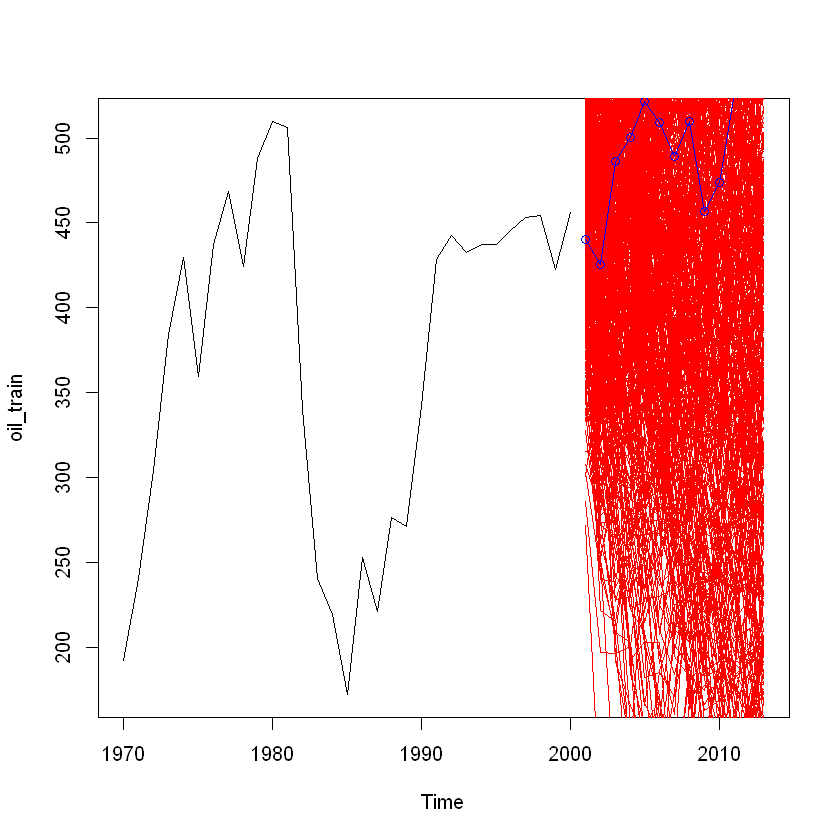

In [8]:
plot(oil_train, xlim=c(1970,2013))
for (i in 1:500){
        lines(simulate(fit_ets,13), col='red')
}
lines(oil_test, xlim=c(1970,2013), col='blue', type='o')
# test데이터의 실제 미래데이터와 비교

2. ausair 데이터 holt선형지수평활법 vs ETS모형
    * ETS모형은 D.I.Y 1에 의해 RMSE값이 가장 낮은 'MAN'모델로 선택

In [9]:
# 데이터 분할
ausair_train<-window(ausair, start=1975, end=2005)
ausair_test<-window(ausair, start=2006, end=2016)

# holt선형지수 평활법 
fit_holt<-holt(ausair_train, h=11)
# ETS모형 
fit_ets<-ets(ausair_train, model='MAN')

# 미래값 예측
for_holt<-forecast(fit_holt, h=11)
for_ets<-forecast(fit_ets, h=11)

# test데이터와 비교해 accuracy예측
accuracy(for_holt, ausair_test)
accuracy(for_ets, ausair_test)


# 두 모델 train에 비해 test데이터의 RMSE값이 비교적 높았다.
# 하지만 두 모델 간 train, test 데이터의 RMSER값들을 서로 비교해보면 holt선형추세법을 사용한 모형이 더 예측정확성이 높았다.
# 따라서 해당 데이터에는 holt선형추세법이 미래의 값을 예측하는데 더 적합하다.

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,-0.006195664,1.620146,1.118594,-1.591612,5.584888,0.7440821,0.0473453,NA
Test set,9.160555034,10.798358,9.160555,13.970665,13.970665,6.0935464,0.6998773,2.331433


,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,0.3526798,1.664772,1.147784,0.2435318,5.407749,0.7634988,0.09926494,NA
Test set,11.3639448,13.205540,11.363945,17.4179517,17.417952,7.5592281,0.71593046,2.845232


ERROR: Error in xy.coords(x, y): 'x' is a list, but does not have components 'x' and 'y'


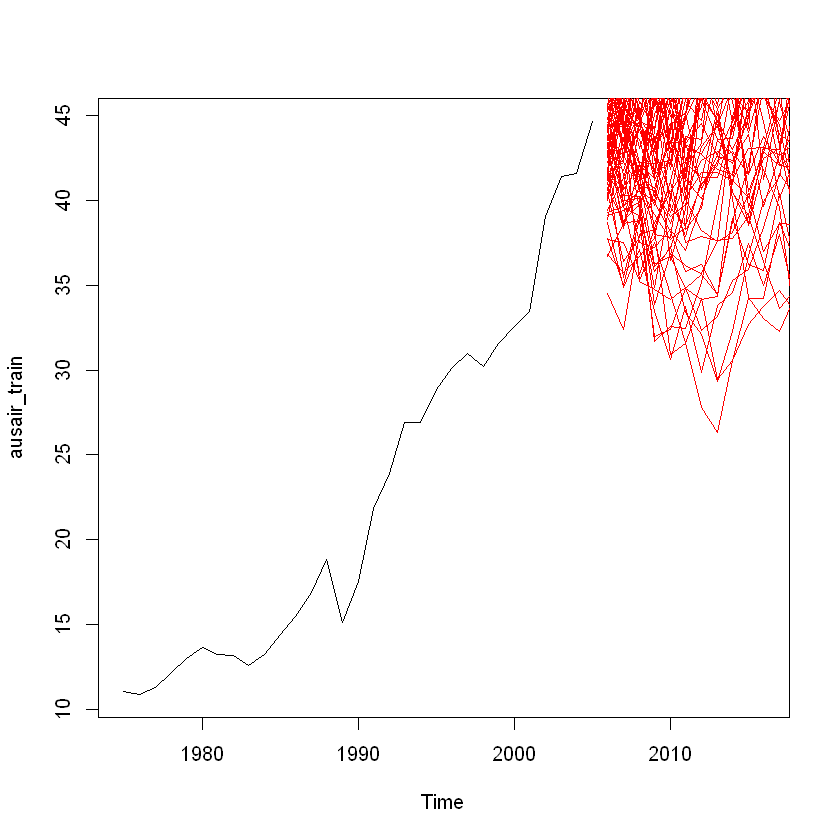

In [13]:
# 모형의 미래값 시뮬레이션 해보기
# holt선형 추세평활법도 simulate 안 됌!
# ETS모델 시뮬레이션 적용
plot(ausair_train, xlim=c(1975,2016))
for (i in 1:100){
    lines(simulate(fit_ets, h=11), col='red')
}
lines(for_holt, col='blue', type='o')
# 실제값 데이터가 그래프에 왜 안나타는건지.. 이전에는 됬었는데..

3. austourists 데이터 홀트-윈터스모형 vs ETS모델 
    * 홀트윈터스의 승법모형이 더 RMSE가 낮았으므로 승법모형으로 선정
    * ETS모델은 'MAM'모델일 때 가장 RMSE가 낮았으므로 해당 모델 선정

In [10]:
# 데이터 분할
# 2015년 데이터만뽑으면 에러가 떠서.. test데이터를 2014~2015년도로 조정했습니다... 에러가 뜨는 이유를 잘모르겠습니다 ㅜㅜ
austo_train<-window(austourists, start=2000, end=c(2013,4))
austo_test<-window(austourists, start=2014, end=c(2015,4))

# 홀트-윈터스 승법모형 적용
fit_hw<-hw(austo_train, seasonal='multiplicative')
# ETS모델 적용
fit_ets<-hw(austo_train, model='MAM')

# 2014,2015년 미래값 예측
for_hw<-forecast(fit_hw, h=2)
for_ets<-forecast(fit_ets, h=2)

# test데이터로 정확도 비교
accuracy(for_hw, austo_test)
accuracy(for_ets, austo_test)

# Train 데이터에는 홀트-윈터스 모형의 RMSE값이 0.1정도 더 낮았다.
# 하지만 Test 데이터에서는 ETS모형의 RMSE값이 홀트-윈터스 모형에 비해 큰 폭으로 낮은 수치를 나타냈다.
# 따라서 austourists 데이터의 미래값을 예측하기 위해서는 ETS모형이 적합한 모형인 듯 판단된다.


,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,-0.04120561,2.145898,1.551358,-0.8266727,4.44042,0.5698674,0.1093837,NA
Test set,-2.03028107,2.950530,2.140932,-3.0677789,3.32474,0.7864383,-0.5000000,0.004986454


,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,0.01600417,2.248029,1.694974,-0.7700315,4.824783,0.6226225,0.04017263,NA
Test set,-1.55896196,1.804448,1.558962,-2.6459442,2.645944,0.5726607,-0.50000000,0.02930557


ERROR: Error in UseMethod("simulate"): 클래스 "forecast"의 객체에 적용된 'simulate'에 사용할수 있는 메소드가 없습니다


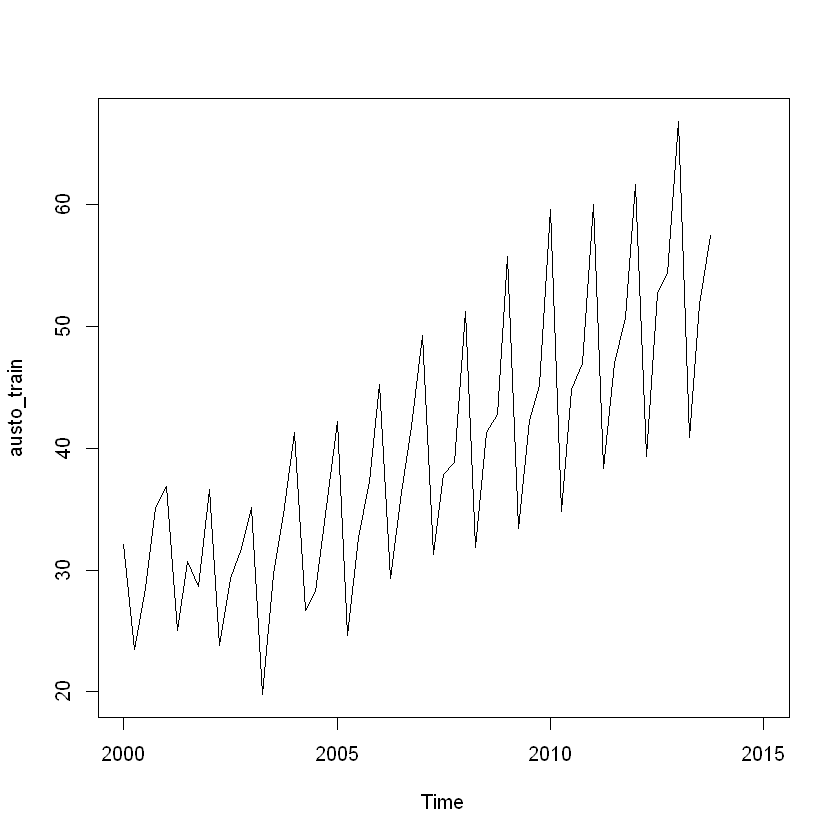

In [11]:
# 시뮬레이션 적용
plot(austo_train, xlim=c(2000,2015))
for (i in 1:100){
    lines(simulate(fit_ets, h=2), col='red')
}